In [1]:
from IPython.display import display, Image
from pprint import pprint
import gv
import pyx

from ginv import *
sympy.init_printing()

In [2]:
cmk = (\
pyx.color.cmyk.Dandelion,\
pyx.color.cmyk.VioletRed,\
pyx.color.cmyk.RoyalPurple,\
pyx.color.cmyk.Cerulean,\
pyx.color.cmyk.Aquamarine,\
pyx.color.cmyk.ForestGreen,\
pyx.color.cmyk.YellowGreen,\
pyx.color.cmyk.Tan,\
)

t, l = 0.08, 1.
r = t*3
n, m = 8, 7

def drawMonom(j, k, mj, mk, clr):
    assert 0 <= mj <= 1
    assert 0 <= mk <= 1
    c.fill(pyx.path.circle(j*l, k*l, r), [clr])        
    c.fill(pyx.path.rect(j*l-r, k*l-r, mj*(n-j)*l+2*r, mk*(m-k)*l+2*r), [clr, pyx.color.transparency(0.75)])

def drawGrid():
    s = [pyx.style.linewidth.normal, pyx.deco.earrow.normal, pyx.style.linestyle.solid]
    c.stroke(pyx.path.line(0, 0, n*l + 0.7*l, 0), s)
    c.stroke(pyx.path.line(0, 0, 0, m*l + 0.7*l), s)

    s = [pyx.text.halign.boxcenter, pyx.text.valign.top]
    c.text(0, -r, r"$1_M$", s)
    for j in range(1, n+1):
        c.text(j*l, -r, r"$x^%d$" % j, s)
    s = [pyx.text.halign.boxright, pyx.text.valign.middle]
    for k in range(1, m+1):
        c.text(-r, k*l, r"$y^%d$" % k, s)    

    for j in range(n+1):
        for k in range(m+1):
            c.fill(pyx.path.circle(j*l, k*l, t))

In [3]:
var = ['x', 'y']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Monom(i)

In [4]:
x**7*y, x**5*y**2, x**4*y**3, x**2*y**4

([7 1], [5 2], [4 3], [2 4])

In [5]:
c = pyx.canvas.canvas()
drawMonom(7, 1, 1, 1, cmk[0])
drawMonom(5, 2, 1, 1, cmk[1])
drawMonom(4, 3, 1, 1, cmk[2])
drawMonom(2, 4, 1, 1, cmk[3])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


The difference between Gröbner bases and their extension by involutive bases is best illustrated. On the left figure, cones of divisible monomials are shown in different colors. As a result of fixing the monomial ordering in the general polynomial case, at the intersection points of the cones, it is necessary to compute $S$-polynomials with respect to the current basis and add them to the basis. Upon completion of this process, a Gröbner basis in the chosen ordering will be obtained. Now, to determine membership, it is sufficient to compute the polynomial's value with respect to the current basis. The sequence of reductions is unimportant since all $S$-polynomials already belong to the basis.

In [6]:
(x**5*y**2).lex(x**7*y), (x**4*y**3).lex(x**5*y**2), (x**2*y**4).lex(x**4*y**3)

In [7]:
(x**5*y**2).nonmult(x**7*y), (x**4*y**3).nonmult(x**7*y), (x**2*y**4).nonmult(x**7*y)

In [8]:
(x**4*y**3).nonmult(x**5*y**2), (x**2*y**4).nonmult(x**5*y**2)

In [9]:
(x**2*y**4).nonmult(x**4*y**3)

In [10]:
c = pyx.canvas.canvas()
drawMonom(7, 1, 1, 1, cmk[0])
drawMonom(5, 2, 0, 1, cmk[1])
drawMonom(4, 3, 0, 1, cmk[2])
drawMonom(2, 4, 0, 1, cmk[3])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [11]:
c = pyx.canvas.canvas()
drawMonom(2, 4, 1, 1, cmk[3])
drawMonom(5, 2, 1, 0, cmk[1])
drawMonom(4, 3, 0, 0, cmk[2])
drawMonom(7, 1, 1, 0, cmk[0])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [12]:
c = pyx.canvas.canvas()
drawMonom(7, 1, 1, 1, cmk[0])
drawMonom(6, 2, 0, 1, cmk[4])
drawMonom(5, 2, 0, 1, cmk[1])
drawMonom(4, 3, 0, 1, cmk[2])
drawMonom(3, 4, 0, 1, cmk[5])
drawMonom(2, 4, 0, 1, cmk[3])
drawGrid()
c.writePDFfile("divjanetfull")
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [13]:
c = pyx.canvas.canvas()
drawMonom(2, 4, 1, 1, cmk[3])
drawMonom(5, 2, 1, 0, cmk[1])
drawMonom(4, 3, 0, 0, cmk[2])
drawMonom(7, 1, 1, 0, cmk[0])
drawMonom(5, 3, 0, 0, cmk[4])
drawMonom(6, 3, 0, 0, cmk[5])
drawMonom(7, 3, 1, 0, cmk[6])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [14]:
c = pyx.canvas.canvas()
drawMonom(2, 4, 1, 1, cmk[3])
drawMonom(5, 2, 1, 0, cmk[1])
drawMonom(4, 3, 0, 0, cmk[2])
drawMonom(5, 3, 1, 0, cmk[4])
drawMonom(7, 1, 1, 0, cmk[0])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [15]:
c = pyx.canvas.canvas()
drawMonom(2, 4, 1, 1, cmk[3])
drawMonom(5, 3, 1, 0, cmk[4])
drawMonom(5, 2, 1, 0, cmk[1])
drawMonom(4, 3, 0, 0, cmk[2])
drawMonom(7, 1, 1, 0, cmk[0])
drawGrid()
display(c)

Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
Transparency not available in PostScript, proprietary ghostscript extension code inserted.
GPL Ghostscript 10.00.0: Unrecoverable error, exit code 1


In [16]:
print(CombRepet(5))
CombRepet(5, 2)

[1, 25/12, 35/24, 5/12, 1/24]


In [17]:
for i in range(7):
    print(i, CombRepet(6, 3).subs(i))

0 0
1 0
2 0
3 1
4 6
5 21
6 56


In [18]:
Monom.cmp = Monom.TOPdeglex # TOPlex, POTdeglex, POTlex

prolong 0, Q 6
x**2*y**4
prolong 0, Q 7
x**4*y**3
prolong 6, Q 7
x**3*y**4
prolong 7, Q 7
x**5*y**2
prolong 7, Q 8
x**7*y
prolong 7, Q 0
x**6*y**2
prolong 8, Q 0
prolong 0, Q 0
       HP: 3s + 10


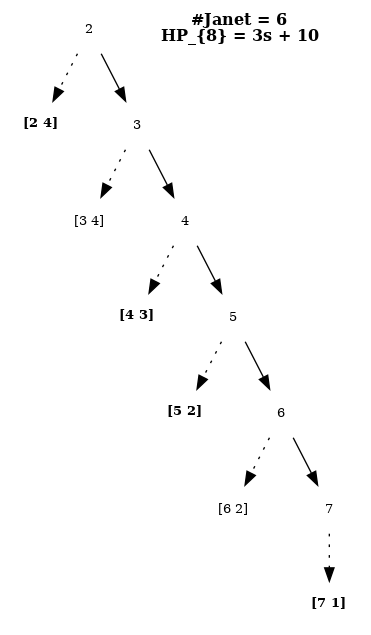

In [19]:
var = ['x', 'y']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))

моnоmial = Janet()
res = ginvBlockLow((x**7*y, x**5*y**2, x**4*y**3, x**2*y**4), \
моnоmial, level=1)
print(f"       HP: {моnоmial.HP()}")
моnоmial.saveImage('моnоmial.png')
Image('./моnоmial.png')

In [20]:
y

[[[0 1], 1]]

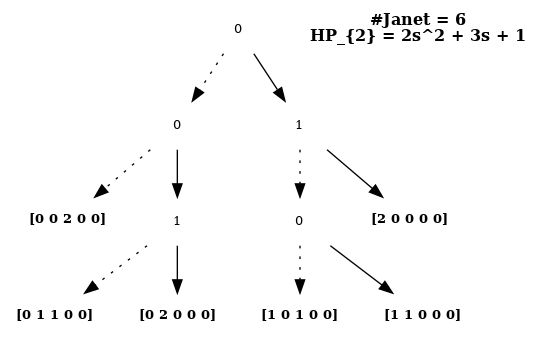

In [21]:
var = ['a', 'b', 'c', 'd', 'e']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))

pommaret = Janet()
q = pommaret.insert(Wrap(p) for p in (\
a**2 - b*e,\
a*b - c*e,\
b**2 - d*e,\
a*c - d*e,\
b*c - a*d,\
c**2 - d*b,\
))
assert q == []
pommaret.saveImage('pommaret.png')
Image('./pommaret.png')

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2
prolong 4, Q 0
x2*x4**4, x3**3*x4**2
prolong 5, Q 0
x3**2*x4**4
prolong 6, Q 0
prolong 0, Q 0
    crit1: 6
    crit2: 0
     time: 0.03 sec
    count: 7
reduction: 54
       HP: 4s + 6


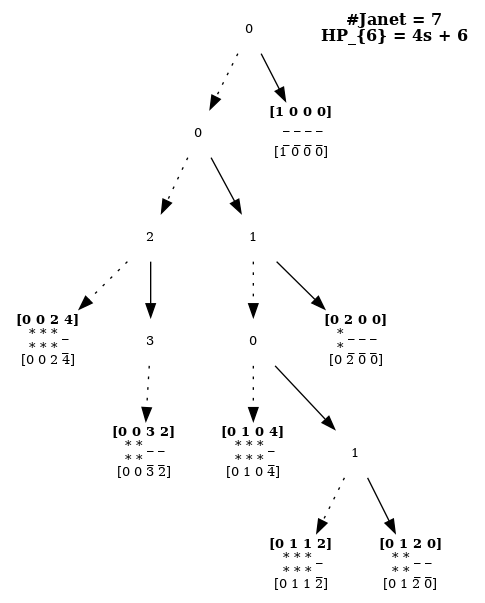

In [22]:
var = ['x1', 'x2', 'x3', 'x4']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic4 = Janet()
res = ginvBlockLow((
x1+x2+x3+x4,\
x1*x2+x2*x3+x3*x4+x4*x1,\
x1*x2*x3+x2*x3*x4+x3*x4*x1+x4*x1*x2,\
x1*x2*x3*x4-1), \
cyclic4, level=1)
print(f"    crit1: {res[1]}")
print(f"    crit2: {res[2]}")
print(f"     time: {res[0]:.2f} sec")
print(f"    count: {cyclic4.count()}")
print(f"reduction: {cyclic4.reduction()}")
print(f"       HP: {cyclic4.HP()}")
cyclic4.saveImage('cyclic4.png', level=3)
Image('./cyclic4.png')

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2, x3**3*x4
prolong 4, Q 5
x2*x3*x4*x5**2, x3**2*x4**3, x3**2*x4**2*x5
prolong 5, Q 6
x2*x3*x4*x5*x6**2, x3*x4**2*x5**3, x3*x4**3*x5**2, x3**2*x4*x5**2*x6, x3*x4**3*x5*x6, x3*x4**2*x5**2*x6, x3*x4**4*x5
prolong 6, Q 0
x3**2*x4**2*x6**3, x2*x4**2*x5**2*x6**2, x4**3*x5**2*x6**2, x2*x4*x5**3*x6**2, x3*x4*x5**4*x6, x4**3*x5**3*x6, x2*x4**2*x5**3*x6, x4**2*x5**4*x6, x2*x4*x5**4*x6, x3**4*x5*x6**2, x3**3*x5**2*x6**2, x2*x4**3*x5**2*x6, x4**4*x5**2*x6, x3*x4**4*x6**2
prolong 4, Q 0
x3**4*x4
prolong 5, Q 0
prolong 7, Q 0
x3*x4*x5**3*x6**3, x3*x4**3*x6**4, x2*x3*x5**3*x6**3, x3**2*x5**3*x6**3, x4**2*x5**3*x6**3, x2*x5**4*x6**3, x4*x5**4*x6**3, x3**3*x5*x6**4, x3**2*x4*x5*x6**4, x2*x4**3*x5*x6**3, x2*x4**2*x5*x6**4, x3*x4**2*x5*x6**4, x2*x3*x5**4*x6**2, x3**2*x5**4*x6**2
prolong 8, Q 0
x3**3, x2*x3*x4, x3**2*x4, x2*x4**2
prolong 3, Q 4
x3*x4**2*x5, x3*x4**3, x4**3*x5, x2*x3*x5**2, x3**2*x5**2, x4**4, x2*x4*x5

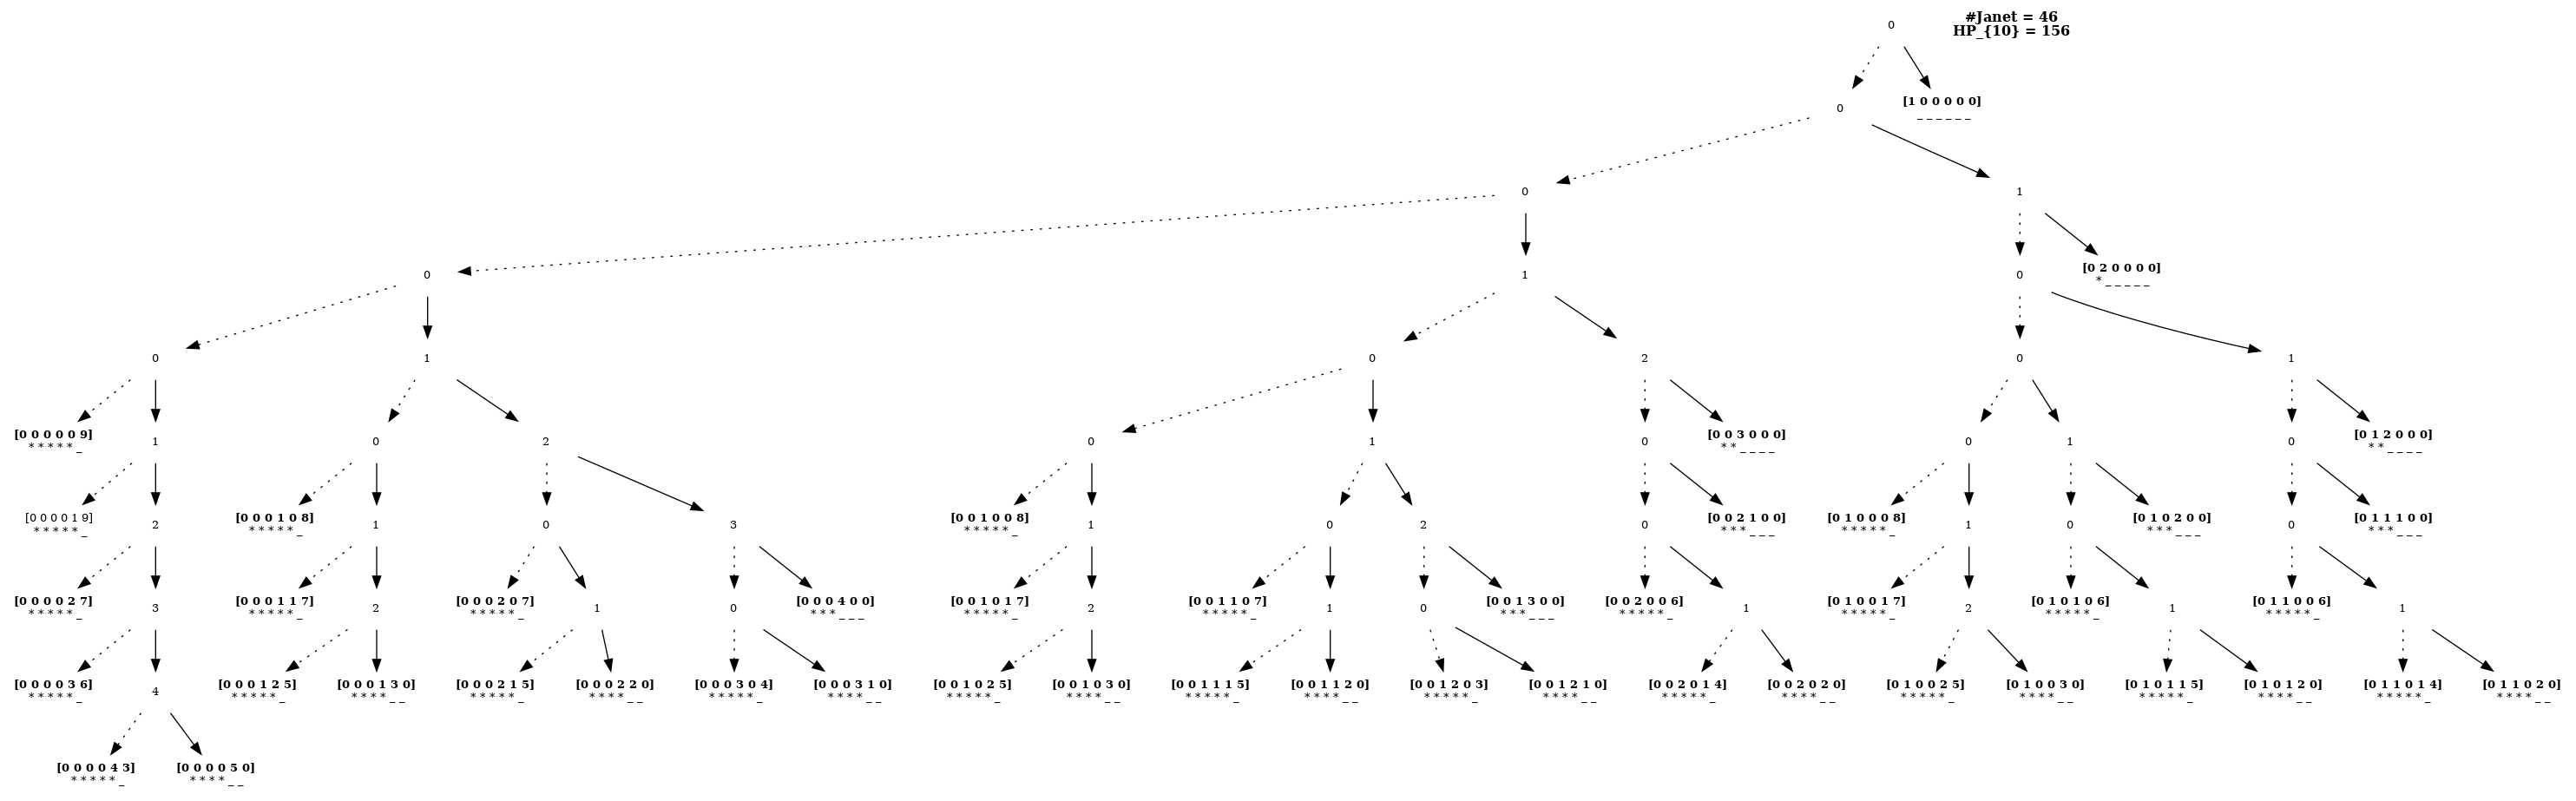

In [23]:
var = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic6 = Janet()
# cyclic6 = JanetCache()
res = ginvBlockLow((
x1+x2+x3+x4+x5+x6,
x1*x2+x1*x6+x2*x3+x3*x4+x4*x5+x5*x6,
x1*x2*x3+x1*x2*x6+x1*x5*x6+x2*x3*x4+x3*x4*x5+x4*x5*x6,
x1*x2*x3*x4+x1*x2*x3*x6+x1*x2*x5*x6+x1*x4*x5*x6+x2*x3*x4*x5+x3*x4*x5*x6,
x1*x2*x3*x4*x5+x1*x2*x3*x4*x6+x1*x2*x3*x5*x6+x1*x2*x4*x5*x6+x1*x3*x4*x5*x6+x2*x3*x4*x5*x6,
x1*x2*x3*x4*x5*x6-1), \
cyclic6, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {cyclic6.count()}")
print(f"reduction: {cyclic6.reduction()}")
print(f"       HP: {cyclic6.HP()}")
cyclic6.saveImage('cyclic6.pdf', level=1)
cyclic6.saveImage('cyclic6.png', level=1)
Image('./cyclic6.png')

In [24]:
print(sum(1 for i in cyclic6))
print(sum(1 for i in cyclic6.GB()))

46
45


prolong 0, Q 3
z**3
prolong 0, Q 3
y**3
prolong 3, Q 3
x**3
prolong 3, Q 0
y*z**3
prolong 4, Q 4
x*z**3
prolong 4, Q 4
x*y**3
prolong 4, Q 0
y**2*z**3
prolong 5, Q 5
x*y*z**3
prolong 5, Q 5
x**2*z**3
prolong 5, Q 5
x**2*y**3
prolong 5, Q 0
x*y**2*z**3
prolong 6, Q 6
x**2*y*z**3
prolong 6, Q 6
prolong 6, Q 0
x**2*y**2*z**3
prolong 7, Q 7
prolong 7, Q 0
prolong 0, Q 0
crit1: 7
crit1: 4
 time: 0.03 sec
    count: 13
reduction: 19
       HP: 27


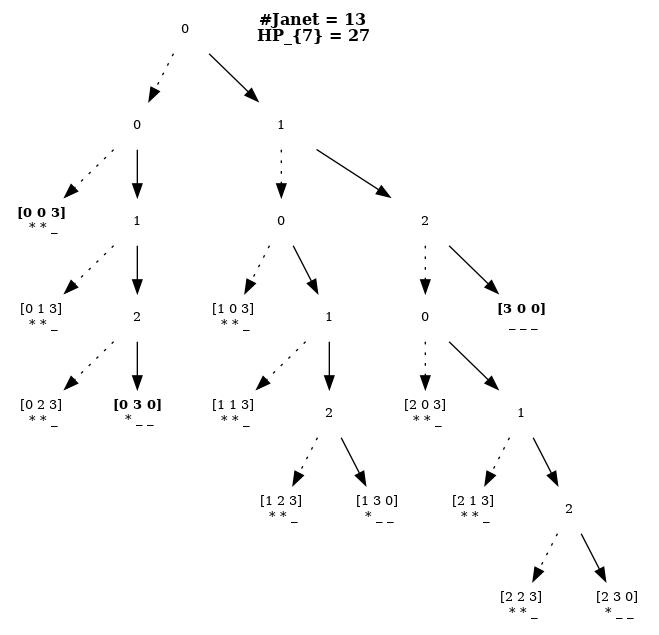

In [25]:
var = ['x', 'y', 'z']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
res = ginvBlockLow((
x**3 - y**2 + z - 1,
y**3 - z**2 + x - 2,
z**3 - x**2 + y - 3), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [26]:
print(sum(1 for i in test))
print(sum(1 for i in test.GB()))

13
3


In [27]:
for w in test:
    print(w.poly)

z**3 + x**2*-1 + y + -3
y*z**3 + x**2*y*-1 + y**2 + y*-3
y**2*z**3 + x**2*y**2*-1 + y**2*-3 + z**2 + x*-1 + 2
y**3 + z**2*-1 + x + -2
x*z**3 + x*y + y**2*-1 + x*-3 + z + -1
x*y*z**3 + x*y**2 + x*y*-3 + y*z + z**2*-1 + x + y*-1 + -2
x*y**2*z**3 + x*y**2*-3 + y**2*z + x*z**2 + y*z**2*-1 + x**2*-1 + x*y + y**2*-1 + x*2 + y*-2
x*y**3 + x*z**2*-1 + x**2 + x*-2
x**2*z**3 + x**2*y + x*y**2*-1 + x**2*-3 + x*z + x*-1
x**2*y*z**3 + x**2*y**2 + x**2*y*-3 + x*y*z + x*z**2*-1 + x**2 + x*y*-1 + x*-2
x**2*y**2*z**3 + x**2*y**2*-3 + x*y**2*z + x**2*z**2 + x*y*z**2*-1 + x**2*y + x*y**2*-1 + x**2*2 + x*y*-2 + y**2*-1 + z + -1
x**2*y**3 + x**2*z**2*-1 + x**2*-2 + y**2 + z*-1 + 1
x**3 + y**2*-1 + z + -1


In [28]:
for w in test.GB():
    print(w.poly)

z**3 + x**2*-1 + y + -3
y**3 + z**2*-1 + x + -2
x**3 + y**2*-1 + z + -1


In [29]:
rows, i = {}, 0
for d in range(8):
    for m in Monom.gradus(d):
        if not test.find(m):
            print(f"{m!r}", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число корней с учетом кратности: {len(rows)}")

[0 0 0], 
[1 0 0], [0 1 0], [0 0 1], 
[2 0 0], [1 1 0], [1 0 1], [0 2 0], [0 1 1], [0 0 2], 
[2 1 0], [2 0 1], [1 2 0], [1 1 1], [1 0 2], [0 2 1], [0 1 2], 
[2 2 0], [2 1 1], [2 0 2], [1 2 1], [1 1 2], [0 2 2], 
[2 2 1], [2 1 2], [1 2 2], 
[2 2 2], 

число корней с учетом кратности: 27


In [30]:
print(f"x**9 <=> {(x**9).NF(test)}")

x**9 <=> y**2*z**2*3 + x**2*y*-3 + x**2*z + x*y*z*3 + y**2*z*-6 + x*z**2*-2 + y*z**2*3 + x*y*-3 + y**2*6 + y*z*-7 + z**2*7 + x*-4 + y*-2 + 2


In [31]:
A = [[0 for k in range(27)] for i in range(27)]
for d in range(27):
    for m, c in (x**d).NF(test):
        A[rows[m]][d] = c

In [32]:
A[0]

In [33]:
b = [0 for i in range(27)]
for m, c in (x**27).NF(test):
    b[rows[m]] = c

In [34]:
b

In [35]:
A, b = sympy.Matrix(A), sympy.Matrix(b)

In [36]:
s = sympy.linsolve((A, b))
s

In [37]:
s = s.args[0]
p = Poly(Monom((27, 0, 0))) - sum(Poly(Monom((d, 0, 0)))*s[d] for d in range(27) if s[d])
print(p)

x**27 + x**24*-9 + x**21*29 + x**19*12 + x**18*-56 + x**17*40 + x**16*-135 + x**15*203 + x**14*-311 + x**13*514 + x**12*-953 + x**11*1062 + x**10*-1319 + x**9*2992 + x**8*-2395 + x**7*3450 + x**6*-5886 + x**5*4067 + x**4*-5795 + x**3*7006 + x**2*-3316 + x*3768 + -3600


In [38]:
p.NF(test)

[]

In [39]:
x = sympy.symbols('x')
sol1 = sympy.nroots(x**27 + x**24*-9 + x**21*29 + x**19*12 + x**18*-56 
+ x**17*40 + x**16*-135 + x**15*203 + x**14*-311 + x**13*514 + x**12*-953 
+ x**11*1062 + x**10*-1319 + x**9*2992 + x**8*-2395 + x**7*3450 
+ x**6*-5886 + x**5*4067 + x**4*-5795 + x**3*7006 + x**2*-3316 + x*3768 + -3600)
for s in sol1:
    print(s)

1.16806505363572
-1.52199063063865 - 0.472367880942079*I
-1.52199063063865 + 0.472367880942079*I
-1.13465546036359 - 0.719984405712257*I
-1.13465546036359 + 0.719984405712257*I
-0.926923594142734 - 1.38896134800554*I
-0.926923594142734 + 1.38896134800554*I
-0.781159943875429 - 1.07128968143714*I
-0.781159943875429 + 1.07128968143714*I
-0.594189223657336 - 1.19894213896259*I
-0.594189223657336 + 1.19894213896259*I
-0.462799712104723 - 1.12248350526833*I
-0.462799712104723 + 1.12248350526833*I
-0.44915808581763 - 1.37356741601555*I
-0.44915808581763 + 1.37356741601555*I
0.0686714903722352 - 1.15836203522044*I
0.0686714903722352 + 1.15836203522044*I
0.404926805269033 - 1.29265863189902*I
0.404926805269033 + 1.29265863189902*I
0.923086188555943 - 0.991773946487541*I
0.923086188555943 + 0.991773946487541*I
0.931900786639237 - 0.405019715427683*I
0.931900786639237 + 0.405019715427683*I
1.43661337711015 - 0.479544062400908*I
1.43661337711015 + 0.479544062400908*I
1.52164547583563 - 0.00725529

In [40]:
from sympy.matrices.sparsetools import _doktocsr
from sympy import SparseMatrix

In [41]:
dct = [{}, {}, {}]
for k, v in rows.items():
    for i in range(3):
        for m, c in Poly(Monom(i)*k).NF(test):
            if c:
                dct[i][rows[m], v] = c

In [42]:
X = [SparseMatrix(27, 27, dct[i]) for i in range(3)]

In [43]:
X[0]*X[1] == X[1]*X[0] and X[0]*X[2] == X[2]*X[0] and X[2]*X[1] == X[1]*X[2]

True

In [44]:
print(len(_doktocsr(X[0])[0]), 27**2, len(_doktocsr(X[0])[0])/27**2)

73 729 0.10013717421124829


In [45]:
_doktocsr(X[0])

In [46]:
X765 = sympy.Matrix([[0 for k in range(27)] for i in range(27)])
for k, v in rows.items():
    for m, c in Poly(Monom((7, 6, 5))*k).NF(test):
        X765[rows[m], v] = c

In [47]:
X765 == X[1]**5*X[0]**7*X[2]**5*X[1]

True

In [48]:
sympy.zeros(27, 27) == X[0]**27 + X[0]**24*-9 + X[0]**21*29 + X[0]**19*12 + X[0]**18*-56\
+ X[0]**17*40 + X[0]**16*-135 + X[0]**15*203 + X[0]**14*-311\
+ X[0]**13*514 + X[0]**12*-953 + X[0]**11*1062 + X[0]**10*-1319\
+ X[0]**9*2992 + X[0]**8*-2395 + X[0]**7*3450 + X[0]**6*-5886\
+ X[0]**5*4067 + X[0]**4*-5795 + X[0]**3*7006 + X[0]**2*-3316 + X[0]*3768 + sympy.eye(27)*-3600

True

In [49]:
for i in range(3):
    print(f"det(X[{i}]) = {X[i].det()}")

det(X[0]) = 3600
det(X[1]) = 15407
det(X[2]) = 23905


In [50]:
import numpy as np
from scipy import linalg

In [51]:
for i in range(3):
    A = np.empty((27, 27), dtype=np.float64)
    for j in range(27):
        for k in range(27):
            A[j][k] = X[i][j, k]
    pprint(linalg.eigvals(A))

array([-1.52199063+0.47236788j, -1.52199063-0.47236788j,
       -1.13465546+0.71998441j, -1.13465546-0.71998441j,
       -0.92692359+1.38896135j, -0.92692359-1.38896135j,
       -0.78115994+1.07128968j, -0.78115994-1.07128968j,
       -0.44915809+1.37356742j, -0.44915809-1.37356742j,
       -0.59418922+1.19894214j, -0.59418922-1.19894214j,
       -0.46279971+1.12248351j, -0.46279971-1.12248351j,
        0.40492681+1.29265863j,  0.40492681-1.29265863j,
        0.06867149+1.15836204j,  0.06867149-1.15836204j,
        0.92308619+0.99177395j,  0.92308619-0.99177395j,
        1.43661338+0.47954406j,  1.43661338-0.47954406j,
        0.93190079+0.40501972j,  0.93190079-0.40501972j,
        1.52164548+0.0072553j ,  1.52164548-0.0072553j ,
        1.16806505+0.j        ])
array([-0.98229265+1.62689646j, -0.98229265-1.62689646j,
       -1.37520861+0.60158378j, -1.37520861-0.60158378j,
       -1.16658632+0.90968529j, -1.16658632-0.90968529j,
       -0.86174064+1.05517497j, -0.86174064-1.05517497j

In [52]:
var = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
fun = []
Monom.init(var, fun)

In [53]:
%%time
rows, i = {}, 0
for d in range(10):
    for m in Monom.gradus(d):
        if not cyclic6.find(m):
            print(f"{m!r}", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число корней с учетом кратности: {len(rows)}")

[0 0 0 0 0 0], 
[0 1 0 0 0 0], [0 0 1 0 0 0], [0 0 0 1 0 0], [0 0 0 0 1 0], [0 0 0 0 0 1], 
[0 1 1 0 0 0], [0 1 0 1 0 0], [0 1 0 0 1 0], [0 1 0 0 0 1], [0 0 2 0 0 0], [0 0 1 1 0 0], [0 0 1 0 1 0], [0 0 1 0 0 1], [0 0 0 2 0 0], [0 0 0 1 1 0], [0 0 0 1 0 1], [0 0 0 0 2 0], [0 0 0 0 1 1], [0 0 0 0 0 2], 
[0 1 1 0 1 0], [0 1 1 0 0 1], [0 1 0 1 1 0], [0 1 0 1 0 1], [0 1 0 0 2 0], [0 1 0 0 1 1], [0 1 0 0 0 2], [0 0 2 0 1 0], [0 0 2 0 0 1], [0 0 1 2 0 0], [0 0 1 1 1 0], [0 0 1 1 0 1], [0 0 1 0 2 0], [0 0 1 0 1 1], [0 0 1 0 0 2], [0 0 0 3 0 0], [0 0 0 2 1 0], [0 0 0 2 0 1], [0 0 0 1 2 0], [0 0 0 1 1 1], [0 0 0 1 0 2], [0 0 0 0 3 0], [0 0 0 0 2 1], [0 0 0 0 1 2], [0 0 0 0 0 3], 
[0 1 1 0 1 1], [0 1 1 0 0 2], [0 1 0 1 1 1], [0 1 0 1 0 2], [0 1 0 0 2 1], [0 1 0 0 1 2], [0 1 0 0 0 3], [0 0 2 0 1 1], [0 0 2 0 0 2], [0 0 1 2 0 1], [0 0 1 1 1 1], [0 0 1 1 0 2], [0 0 1 0 2 1], [0 0 1 0 1 2], [0 0 1 0 0 3], [0 0 0 3 0 1], [0 0 0 2 1 1], [0 0 0 2 0 2], [0 0 0 1 2 1], [0 0 0 1 1 2], [0 0 0 1 0 3], [0 0 0

In [54]:
%%time
dct = [{} for i in range(6)]
for k, v in rows.items():
    for i in range(6):
        for m, c in Poly(Monom(i)*k).NF(cyclic6):
            if c:
                dct[i][rows[m], v] = c
print([len(dct[i]) for i in range(6)], 156*156)

[2789, 2728, 2548, 2406, 1952, 799] 24336
CPU times: user 3.77 s, sys: 3.48 ms, total: 3.77 s
Wall time: 3.77 s


In [55]:
%%time
for i in range(6):
    A = np.empty((156, 156), dtype=np.float64)
    d = dct[i]
    for j in range(156):
        for k in range(156):
            A[j][k] = d.get((j, k), 0.)
    pprint(linalg.eigvals(A))

array([ 3.73205081e+00+0.00000000e+00j,  1.86602540e+00+3.23205081e+00j,
        1.86602540e+00-3.23205081e+00j, -3.73205081e+00+0.00000000e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -3.73205081e+00+0.00000000e+00j,  1.86602540e+00+3.23205081e+00j,
        1.86602540e+00-3.23205081e+00j,  3.73205081e+00+0.00000000e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -2.14064877e-15+2.29663026e+00j, -2.14064877e-15-2.29663026e+00j,
       -1.55431223e-15+2.29663026e+00j, -1.55431223e-15-2.29663026e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
       -9.30604859e-01+3.66025404e-01j, -9.30604859e-01-3.66025404e-01j,
       -1.48315131e-01+9.88940151e-01j, -1.48315131

array([-3.73205081e+00+0.00000000e+00j, -3.73205081e+00+0.00000000e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
        3.73205081e+00+0.00000000e+00j,  3.73205081e+00+0.00000000e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        4.84473572e-14+2.29663026e+00j,  4.84473572e-14-2.29663026e+00j,
       -9.04831765e-15+2.29663026e+00j, -9.04831765e-15-2.29663026e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -1.48315131e-01+9.88940151e-01j, -1.48315131e-01-9.88940151e-01j,
        1.48315131e-01+9.88940151e-01j,  1.48315131

array([ 3.73205081e+00+0.00000000e+00j,  1.86602540e+00+3.23205081e+00j,
        1.86602540e+00-3.23205081e+00j, -1.86602540e+00+3.23205081e+00j,
       -1.86602540e+00-3.23205081e+00j, -3.73205081e+00+0.00000000e+00j,
       -3.73205081e+00+0.00000000e+00j, -1.86602540e+00+3.23205081e+00j,
       -1.86602540e+00-3.23205081e+00j,  3.73205081e+00+0.00000000e+00j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
        1.91513472e-15+2.29663026e+00j,  1.91513472e-15-2.29663026e+00j,
       -4.38538095e-15+2.29663026e+00j, -4.38538095e-15-2.29663026e+00j,
       -9.30604859e-01+3.66025404e-01j, -9.30604859e-01-3.66025404e-01j,
        7.82289728e-01+6.22914747e-01j,  7.82289728

https://link.springer.com/article/10.1007/BF01782361
<img src="Zum Hilbertschen Nullstellensatz.png">

prolong x**3
x**3
prolong y**3
y**3
prolong k*y
y*x**3
prolong k*y
y**2*x**3
prolong k*y
k*y
prolongAll
k*x**3
prolong k*x**3
y**2
prolong y**2*x**3
prolongAll
k*x**2
prolong k*x**3
k*x
prolong k*x**2
k
prolong k*x
prolongAll
crit1: 5
crit1: 0
 time: 0.06 sec
    count: 4
reduction: 44
       HP: 6


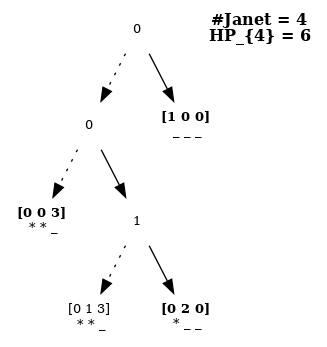

In [56]:
Monom.cmp = Monom.POTlex
var = ['k', 'y', 'x']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
res = ginvMin((
x*(x+1)*(x+2),
y*(y+1)*(y+2),
(x - y)*k - 1,\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [57]:
for w in test.GB():
    print(w.poly*(-1))

x**3*-1 + x**2*-3 + x*-2
y**2 + y*x + y*3 + x**2 + x*3 + 2
k*2 + y*x**2*-3 + y*x*-6 + y*-1 + x**2*-3 + x*-8 + -3


In [58]:
for w in test.GB():
    print(str(w.poly).replace('x', 'x{v}').replace('y', 'x{w}'))

x{v}**3 + x{v}**2*3 + x{v}*2
x{w}**2*-1 + x{w}*x{v}*-1 + x{w}*-3 + x{v}**2*-1 + x{v}*-3 + -2
k*-2 + x{w}*x{v}**2*3 + x{w}*x{v}*6 + x{w} + x{v}**2*3 + x{v}*8 + 3


prolong x**4
x**4
prolong y**4
y**4
prolong k*y
y*x**4
prolong k*y
y**2*x**4
prolong k*y
y**3*x**4
prolong k*y
k*y
prolongAll
k*x**4
prolong k*x**4
y**3
prolong y**3*x**4
prolongAll
k*x**3
prolong k*x**4
k*x**2
prolong k*x**3
k*x
prolong k*x**2
k
prolong k*x
prolongAll
crit1: 6
crit1: 0
 time: 0.04 sec
    count: 5
reduction: 62
       HP: 12


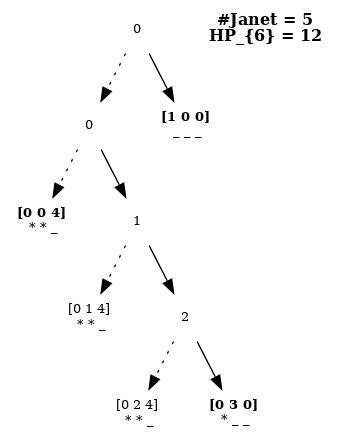

In [59]:
Monom.cmp = Monom.POTlex
var = ['k', 'y', 'x']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
res = ginvMin((
x*(x+1)*(x-1)*(x-2),
y*(y+1)*(y-1)*(y-2),
(x - y)*k -1), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [60]:
for w in test.GB():
    print(w.poly)

x**4 + x**3*-2 + x**2*-1 + x*2
y**3*-1 + y**2*x*-1 + y**2*2 + y*x**2*-1 + y*x*2 + y + x**3*-1 + x**2*2 + x + -2
k*18 + y**2*x**3*-10 + y**2*x**2*15 + y**2*x*13 + y**2*-9 + y*x**3*10 + y*x**2*-24 + y*x*-4 + y*18 + x**3*9 + x**2*-9 + x*-27 + 9


In [61]:
for w in test.GB():
    print(str(w.poly).replace('x', 'x{v}').replace('y', 'x{w}'))

x{v}**4 + x{v}**3*-2 + x{v}**2*-1 + x{v}*2
x{w}**3*-1 + x{w}**2*x{v}*-1 + x{w}**2*2 + x{w}*x{v}**2*-1 + x{w}*x{v}*2 + x{w} + x{v}**3*-1 + x{v}**2*2 + x{v} + -2
k*18 + x{w}**2*x{v}**3*-10 + x{w}**2*x{v}**2*15 + x{w}**2*x{v}*13 + x{w}**2*-9 + x{w}*x{v}**3*10 + x{w}*x{v}**2*-24 + x{w}*x{v}*-4 + x{w}*18 + x{v}**3*9 + x{v}**2*-9 + x{v}*-27 + 9


C. Y. Chao and Z. Chen, On uniquely 3-colorable graphs, Discrete Math. 112 (1993), 21–27
![image info](./3-Figure2-1.png)

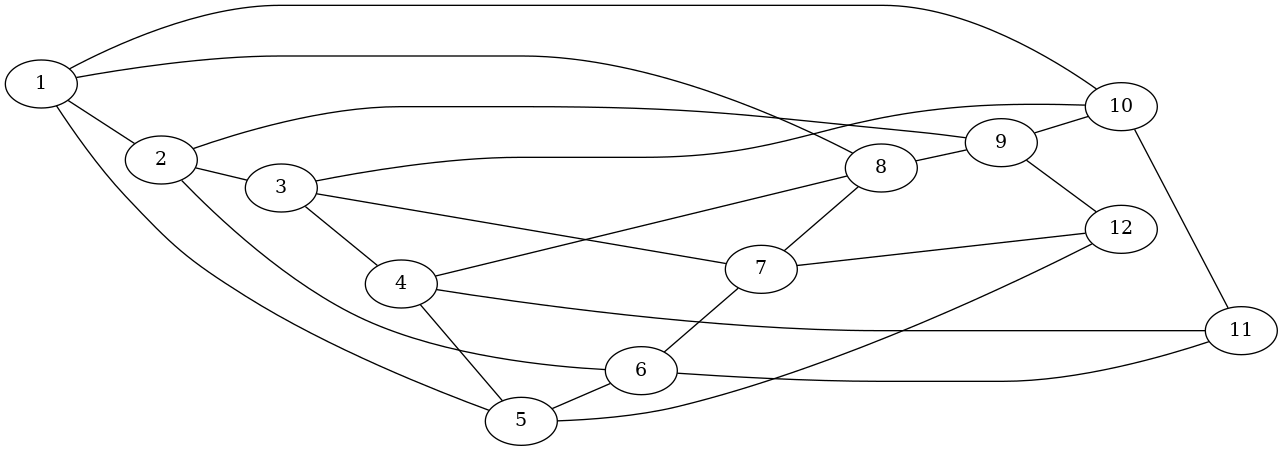

In [62]:
graph = (
(1, 2, 5, 8, 10),\
(2, 3, 6, 9),\
(3, 4, 7, 10),\
(4, 5, 8, 11),\
(5, 6, 12),\
(6, 7, 11),\
(7, 8, 12),\
(8, 9),\
(9, 10, 12),\
(10, 11),\
)

g, edge = gv.graph('grey'), {}
gv.setv(g, 'rankdir', 'LR')
for vs in graph:
    a = gv.node(g, str(vs[0]))
    if vs[0] not in edge: edge[vs[0]] = a
    for v in vs[1:]:
        if v not in edge: edge[v] = gv.node(g, str(v))
        gv.edge(a, edge[v])
gv.layout(g, 'dot')
gv.render(g, "png", 'grey.png')
Image('grey.png')

prolong 0, Q 2
x10**2
prolong 0, Q 2
x9**2
prolong 2, Q 2
x9*x10, x8**2, x7**2, x7*x8, x6**2, x6*x7, x5**2, x5*x6, x4**2, x4*x5, x4*x8, x3**2, x3*x4, x3*x7, x2**2, x2*x3, x2*x6, x1**2, x1*x2, x1*x5, x1*x8
prolong 2, Q 3
x12**3
prolong 3, Q 3
x11**3
prolong 3, Q 3
x9*x11**2, x6*x11**2, x5*x11**2, x4*x11**2, x3*x10*x11, x1*x10*x11, x4*x9*x11, x2*x9*x11, x4*x7*x11, x8*x9*x11, x8*x10**2, x7*x10**2, x6*x10**2, x5*x10**2, x4*x10**2, x3*x10**2, x2*x10**2, x1*x10**2, x8*x9*x10, x7*x9*x10, x6*x9*x10, x5*x9*x10, x4*x9*x10, x3*x9*x10, x2*x9*x10, x1*x9*x10, x1*x7*x10, x3*x6*x10, x6*x9*x11, x1*x6*x10, x5*x10*x11, x3*x5*x10, x1*x4*x10, x7*x10*x11, x8*x9**2, x7*x9**2, x6*x9**2, x5*x9**2, x4*x9**2, x3*x9**2, x2*x9**2, x1*x9**2, x6*x8*x9, x5*x8*x9, x3*x8*x9, x2*x7*x9, x2*x5*x9, x2*x4*x9, x6*x8**2, x5*x8**2, x3*x8**2, x2*x8**2, x5*x7*x8, x2*x7*x8, x2*x4*x8, x5*x7**2, x4*x7**2, x2*x7**2, x1*x7**2, x4*x6*x7, x1*x6*x7, x1*x3*x7, x4*x6**2, x3*x6**2, x1*x6**2, x3*x5*x6, x3*x5**2, x2*x5**2, x2*x4*x5, x2*x4**2

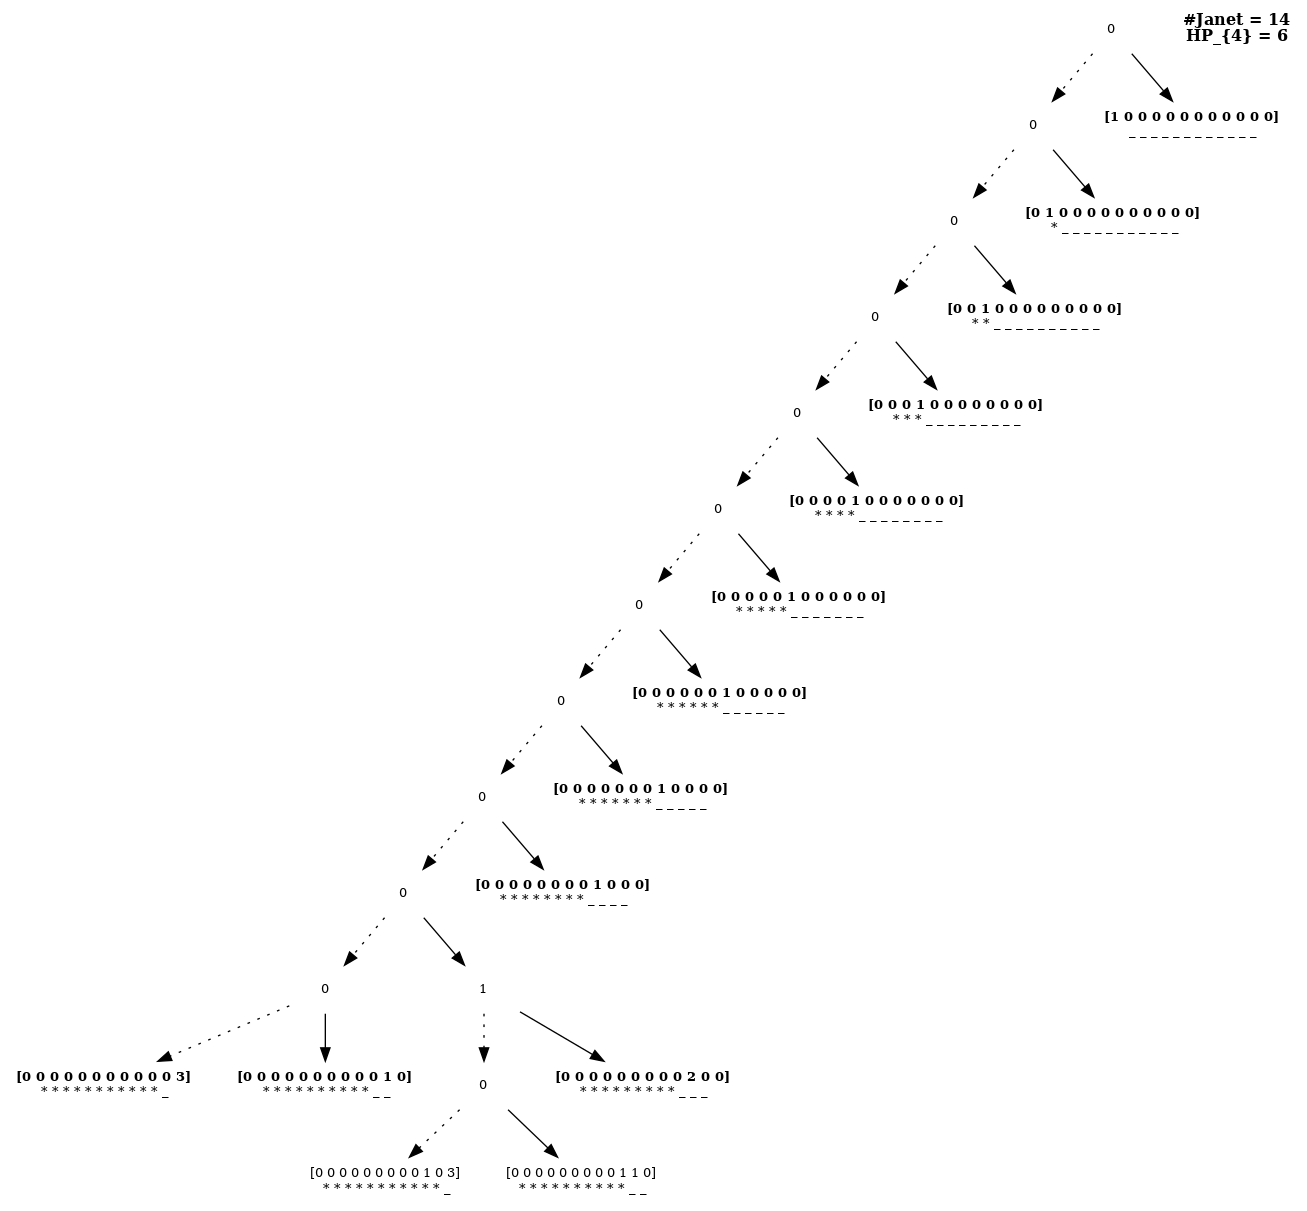

In [63]:
Monom.cmp = Monom.TOPdeglex
var = [f"x{vs}" for vs in range(1, 13)]
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
lst = [eval(f"{v}**3 + {v}*-1") for v in var]
# lst = [eval(f"{v}**4 + {v}**3*-2 + {v}**2*-1 + {v}*2") for v in var]
for vs in graph:
    w = vs[0]
    for v in vs[1:]:
        lst.append(eval(f"x{w}**2*-1 + x{w}*x{v}*-1 + x{v}**2*-1 + 1"))
#         lst.append(eval(f"""x{w}**3*-1 + x{w}**2*x{v}*-1 + x{w}**2*2\
# + x{w}*x{v}**2*-1 + x{w}*x{v}*2 + x{w} + x{v}**3*-1 + x{v}**2*2 + x{v} + -2"""))
res = ginvBlockLow(lst, test, level=1)
# res = ginvMin(lst, test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [64]:
for w in test.GB():
    print(w.poly)

x12**3 + x12*-1
x11*-1 + x12
x10**2*-1 + x10*x12*-1 + x12**2*-1 + 1
x9 + x10 + x12
x8*-1 + x12
x7*-1 + x10
x6 + x10 + x12
x5*-1 + x10
x4*-1 + x10*-1 + x12*-1
x3*-1 + x12
x2 + x10*-1
x1 + x10 + x12


In [65]:
lst1 = [w.poly for w in test.GB()]
test1 = Janet()
lst1.append(x12-1)
res = ginvBlockLow(lst1, test1, level=1)
print(f" time: {res[0]:.2f} sec")
print(f"       HP: {test1.HP()}")
for w in test1.GB():
    print(w.poly)

prolong 0, Q 1
x12
prolong 0, Q 1
x11
prolong 1, Q 1
x9
prolong 1, Q 1
x8
prolong 1, Q 1
x7
prolong 1, Q 1
x6
prolong 1, Q 1
x5
prolong 1, Q 1
x4
prolong 1, Q 1
x3
prolong 1, Q 1
x2
prolong 1, Q 1
x1
prolong 1, Q 2
x10**2
prolong 1, Q 2
x10*x12
prolong 2, Q 2
x10*x11
prolong 2, Q 2
prolong 2, Q 0
prolong 0, Q 0
 time: 0.03 sec
       HP: 2
x12 + -1
x11*-1 + 1
x10**2*-1 + x10*-1
x9 + x10 + 1
x8*-1 + 1
x7*-1 + x10
x6 + x10 + 1
x5*-1 + x10
x4*-1 + x10*-1 + -1
x3*-1 + 1
x2 + x10*-1
x1 + x10 + 1


In [66]:
lst2 = [w.poly for w in test1.GB()]
test2 = Janet()
lst2.append(x10+1)
res = ginvBlockLow(lst2, test2, level=1)
print(f" time: {res[0]:.2f} sec")
print(f"       HP: {test2.HP()}")
for w in test2.GB():
    print(w.poly)

prolong 0, Q 1
x12
prolong 0, Q 1
x11
prolong 1, Q 1
x10
prolong 1, Q 1
x9
prolong 1, Q 1
x8
prolong 1, Q 1
x7
prolong 1, Q 1
x6
prolong 1, Q 1
x5
prolong 1, Q 1
x4
prolong 1, Q 1
x3
prolong 1, Q 1
x2
prolong 1, Q 1
x1
prolong 1, Q 2
prolong 0, Q 0
 time: 0.02 sec
       HP: 1
x12 + -1
x11*-1 + 1
x10 + 1
x9
x8*-1 + 1
x7*-1 + -1
x6
x5*-1 + -1
x4
x3*-1 + 1
x2 + 1
x1


In [67]:
lst3 = [w.poly for w in test2.GB()]
test3 = Janet()
lst3.append(x10 - 1)
res = ginvBlockLow(lst3, test3, level=1)
print(f" time: {res[0]:.2f} sec")
print(f"       HP: {test3.HP()}")
for w in test3.GB():
    print(w.poly)

prolong 0, Q 1
x12
prolong 0, Q 1
x11
prolong 1, Q 1
x10
prolong 1, Q 1
1
prolong 0, Q 1
prolong 0, Q 0
 time: 0.00 sec
       HP: 0
1


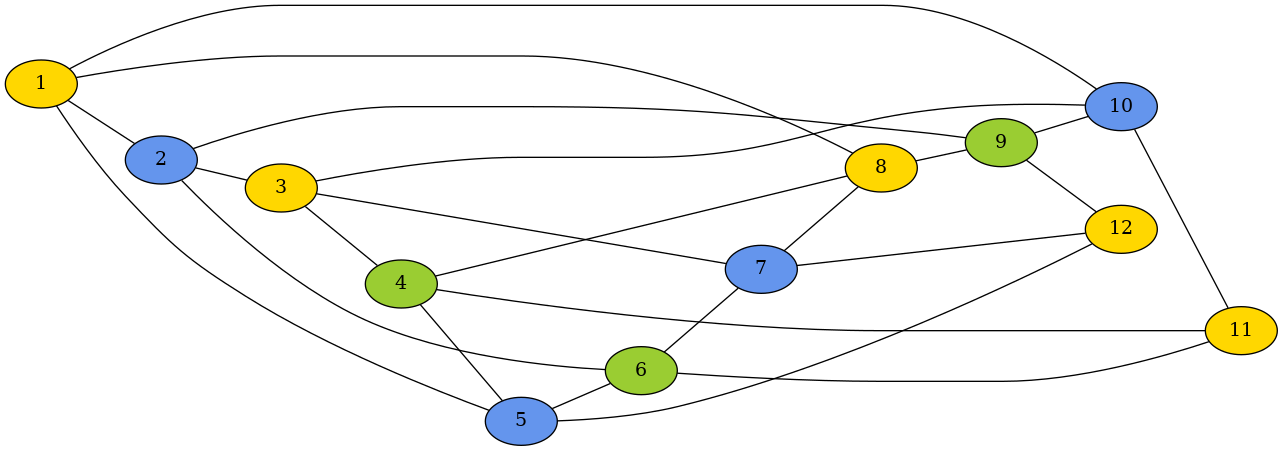

In [68]:
sol = {12: 0, 11: 0, 10: 1, 9: -1, 8: 0, 7: 1, 
      6: -1, 5: 1, 4: -1, 3: 0, 2: 1, 1: 0}
colors = {
-1: "yellowgreen",\
 0: "gold",\
 1: "cornflowerblue",\
 2: "mediumpurple",\
}

g, edge = gv.graph('color'), {}
gv.setv(g, 'rankdir', 'LR')
for vs in graph:
    a = gv.node(g, str(vs[0]))
    gv.setv(a, 'style', 'filled')
    gv.setv(a, 'fillcolor', colors[sol[vs[0]]])
    if vs[0] not in edge: edge[vs[0]] = a
    for v in vs[1:]:
        if v not in edge: edge[v] = gv.node(g, str(v))
        gv.edge(a, edge[v])

for v in (11, 12):
    a = edge[v]
    gv.setv(a, 'style', 'filled')
    gv.setv(a, 'fillcolor', colors[sol[v]])

gv.layout(g, 'dot')
gv.render(g, "png", 'color.png')
Image('color.png')

Polynomial GCDs by syzygies
https://ieeexplore.ieee.org/document/7829593

In [69]:
Monom.cmp = Monom.POTlex
var = ['x']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
for i, g in enumerate(fun):
    globals()[g] = Poly(Monom(pos=i))    
test = Janet()
res = ginvMin((\
(2 + 5*x + x**2)*(-1 + x - 3*x**2 + x**3),\
(2 + 5*x + x**2)*(-2 - 4*x - 4*x**2 + x**3),\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")

prolong x**5
x**5
prolong x**5
x**4
prolong x**5
x**3
prolong x**4
x**2
prolong x**3
prolongAll
crit1: 0
crit1: 0
 time: 0.00 sec
    count: 1
reduction: 10
       HP: 2


In [70]:
for w in test.GB():
    print(w.poly)

x**2 + x*5 + 2


In [71]:
Monom.cmp = Monom.POTlex
var = ['x']
fun = 'a, b, c'.split(', ')
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
for i, g in enumerate(fun):
    globals()[g] = Poly(Monom(pos=i))    
test = Forest(Janet)
res = ginvMin((\
(2 + 5*x + x**2)*(-1 + x - 3*x**2 + x**3)*a + b,\
(2 + 5*x + x**2)*(-2 - 4*x - 4*x**2 + x**3)*a + c,\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")

prolong a*x**5
a*x**5
prolong a*x**5
a*x**4
prolong a*x**5
a*x**3
prolong a*x**4
a*x**2
prolong a*x**3
b*x**3
prolongAll
crit1: 0
crit1: 0
 time: 0.01 sec
    count: 2
reduction: 10
       HP: s + 6


In [72]:
for w in test.GB():
    print(w.poly)

a*x**2*59 + a*x*295 + a*118 + b*x**2*-4 + b*x*15 + b*-27 + c*x**2*4 + c*x*-11 + c*16
b*x**3*-1 + b*x**2*4 + b*x*-4 + b*-2 + c*x**3 + c*x**2*-3 + c*x + c*-1


In [73]:
a, b, c, x = sympy.symbols('a, b, c, x')
p = a*x**2*59 + a*x*295 + a*118 + b*x**2*-4 + b*x*15 + b*-27 + c*x**2*4 + c*x*-11 + c*16
p.collect([a, b, c])

In [74]:
p.coeff(a).factor()

In [75]:
(b*x**3*-1 + b*x**2*4 + b*x*-4 + b*-2 + c*x**3 + c*x**2*-3 + c*x + c*-1).collect([a, b, c])

In [76]:
Monom.cmp = Monom.POTlex
var = ['x', 'y']
fun = 'a, b, c'.split(', ')
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
for i, g in enumerate(fun):
    globals()[g] = Poly(Monom(pos=i))    
test = Forest(Janet)
res = ginvMin((\
(2 + x + y - 3*x*y + x**3*y + y**2)*(x**2*y + x**3*y + x*y**4)*a + b,\
(1 - 2*x*y**2 + 3*x**2*y**2 - 2*y**3)*(x**2*y + x**3*y + x*y**4)*a + c,\
), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")

prolong a*x**5*y**3
a*x**5*y**3
prolong a*x**6*y**2
a*x**6*y**2
prolongAll
a*x**4*y**4
prolongAll
a*x**5*y**2
prolong a*x**5*y**3
a*x**5*y
prolong a*x**5*y**2
a*x**4*y**3
prolong a*x**4*y**4
a*x**4*y**2
prolong a*x**4*y**3
a*x**4*y
prolong a*x**4*y**2
a*x**3*y**10
prolongAll
b*x**2*y**5
prolong b*x**2*y**6
b*x**2*y**4
prolong b*x**2*y**5
b*x**2*y**3
prolong b*x**2*y**4
a*x**6*y
prolong a*x**6*y**2
b*x**2*y**2
prolong b*x**2*y**3
prolongAll
crit1: 0
crit1: 0
 time: 0.16 sec
    count: 5
reduction: 109
       HP: s^2/2 + 19s/2 + 6


In [77]:
for w in test.GB():
    print(w.poly)

a*x**3*y**10*-8 + a*x**3*y**9*63 + a*x**3*y**8*-98 + a*x**3*y**7*179 + a*x**3*y**6*218 + a*x**3*y**5*-39 + a*x**3*y**4*8 + a*x**3*y**3*9 + a*x**3*y**2*-6 + a*x**3*y*-1 + a*x**2*y**10*-8 + a*x**2*y**9*63 + a*x**2*y**8*-98 + a*x**2*y**7*179 + a*x**2*y**6*218 + a*x**2*y**5*-39 + a*x**2*y**4*8 + a*x**2*y**3*9 + a*x**2*y**2*-6 + a*x**2*y*-1 + a*x*y**13*-8 + a*x*y**12*63 + a*x*y**11*-98 + a*x*y**10*179 + a*x*y**9*218 + a*x*y**8*-39 + a*x*y**7*8 + a*x*y**6*9 + a*x*y**5*-6 + a*x*y**4*-1 + b*x*y**6*-18 + b*x*y**5*69 + b*x*y**4*-27 + b*x*y**3*-9 + b*y**6*3 + b*y**5*73 + b*y**4*36 + b*y**3*-12 + c*x**2*y**5*6 + c*x**2*y**4*-23 + c*x**2*y**3*9 + c*x**2*y**2*3 + c*x*y**5*-5 + c*x*y**4*-9 + c*x*y**3*-18 + c*x*y**2*2 + c*y**6*4 + c*y**5*-30 + c*y**4*87 + c*y**3*-34 + c*y**2*-9 + c*y*6 + c
a*x**4*y*6892355 + a*x**3*y**9*-35784768 + a*x**3*y**8*288157760 + a*x**3*y**7*-490603503 + a*x**3*y**6*895810361 + a*x**3*y**5*806508859 + a*x**3*y**4*-296967770 + a*x**3*y**3*126023568 + a*x**3*y**2*30839477 + a*x

In [78]:
a, b, c, x, y = sympy.symbols('a, b, c, x, y')
p = b*x**2*y**2*3 + b*x*y**2*2 + b*y**3*-2 + b*-1 + c*x**3*y*-1 + c*x*y*3 + c*x*-1 + c*y**2*-1 + c*y*-1 + c*-2
p.collect([a, b, c])

In [79]:
(((2 + x + y - 3*x*y + x**3*y + y**2)*(x**2*y + x**3*y + x*y**4))\
 .expand()/p.coeff(c)).cancel()